# One Way ANOVA  +  Post Hoc Test for Normal People

To identify the most discriminative AUs that vary significantly with emotion, within normal people, using bidirectional (two-way) ANOVA, we'll need to:

Test which AUs show statistically significant variation across:

   -Emotions




## 1. PyFeat 

### 1.1 Format our DataFrame

The goal is to format our csv files and combine them in one file in this format:

 emotion   | frame | AU01 | AU02 | AU04 | .. |
 --------- | ----- | ---- | ---- | ---- | ---|
 happiness | 001   | 0.72 | 0.55 | 0.12 | .. | 
 happiness | 002   | 0.68 | 0.50 | 0.14 | .. | 
 sadness   | 001   | 0.10 | 0.22 | 0.50 | .. | 
 sadness   | 002   | 0.12 | 0.20 | 0.48 | .. | 
 happiness | 001   | 0.65 | 0.48 | 0.10 | .. |
 happiness | 002   | 0.63 |  ..  |  ..  | .. | 



In [2]:
import os
import pandas as pd

In [4]:


base_path = "/home/maram/Downloads/PrendreLaParole/PEDFE/newFPS"
emotions = ["Happiness", "Fear", "Surprise", "Anger", "Disgust", "Sadness"]

all_data = []

for emotion in emotions:
    csv_path = os.path.join(base_path, emotion, f"Frames_{emotion}_AUs.csv")
        
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df['emotion'] = emotion
        all_data.append(df)
    else:
        print(f"File not found: {csv_path}")

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)


# List all columns except resident, emotion, frame
au_columns = [col for col in combined_df.columns if col not in ['emotion', 'frame']]

# New column order
new_order = ['emotion', 'frame'] + au_columns

# Reorder the DataFrame
final_df = combined_df[new_order]
final_df
# Optional: save to CSV
final_df.to_csv(os.path.join(base_path,"Frames_all_emotions_pyFeat.csv"), index=False)

In [6]:
final_df

,emotion,frame,video_name,AU01,AU02,AU04,AU05,AU06,AU07,AU09,...,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,Happiness,0,3_fg_2.mp4,0.255111,0.332181,0.238748,0.349041,0.465382,1.0,0.587543,...,0.869056,0.070991,0.406105,1.0,0.463630,0.337076,0.382468,0.254633,0.128461,0.242488
1,Happiness,1,3_fg_2.mp4,0.231044,0.271574,0.213551,0.346657,0.535796,1.0,0.584861,...,0.824869,0.068376,0.425538,1.0,0.642977,0.216144,0.716420,0.336024,0.167541,0.320032
2,Happiness,2,3_fg_2.mp4,0.207444,0.271521,0.255408,0.286786,0.526097,1.0,0.550827,...,0.800691,0.090964,0.491409,1.0,0.473954,0.123414,0.923020,0.153763,0.277611,0.249821
3,Happiness,3,3_fg_2.mp4,0.179090,0.245680,0.240004,0.291576,0.546958,1.0,0.572145,...,0.823471,0.141971,0.489177,1.0,0.645999,0.175051,0.594473,0.203801,0.144331,0.285903
4,Happiness,4,3_fg_2.mp4,0.142878,0.279937,0.249078,0.337617,0.619991,1.0,0.609724,...,0.837468,0.161819,0.533571,1.0,0.668808,0.143987,0.964873,0.262717,0.186725,0.265538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,Sadness,74,36_tg_4.mp4,0.273132,0.169615,0.207050,0.409453,0.169288,0.0,0.100913,...,0.458821,0.625206,0.680298,0.0,0.627629,0.647224,0.207757,0.184853,0.289051,0.082913
5207,Sadness,75,36_tg_4.mp4,0.355816,0.249066,0.319921,0.417206,0.167079,0.0,0.114859,...,0.478572,0.658966,0.624549,0.0,0.566490,0.553980,0.218618,0.118083,0.176419,0.083614
5208,Sadness,76,36_tg_4.mp4,0.365918,0.237413,0.234008,0.401757,0.162187,0.0,0.139675,...,0.350601,0.582625,0.634742,0.0,0.600221,0.468556,0.403756,0.142966,0.195404,0.094499
5209,Sadness,77,36_tg_4.mp4,0.434748,0.234640,0.159558,0.285278,0.228586,0.0,0.328373,...,0.459276,0.639717,0.601912,0.0,0.528180,0.546179,0.132374,0.213415,0.201170,0.170350


### 1.2 Apply  **ANOVA + Post Hoc Test**  on every AU for all emotions

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

au_columns = [col for col in final_df.columns if col.startswith('AU')]

anova_results = {}

for au in au_columns:
    df_au = final_df[[au, 'emotion']].dropna()
    model = ols(f'{au} ~ C(emotion)', data=df_au).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][0]
    anova_results[au] = p_value


/tmp/ipykernel_6485/106005117.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_6485/106005117.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_6485/106005117.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_6485/106005117.py:12: FutureWarning: Series.__getitem__ treating ke

In [7]:
anova_results

{'AU01': 2.432112265414144e-295,
 'AU02': 4.055466868383059e-71,
 'AU04': 6.644633737516979e-94,
 'AU05': 2.3768245136076114e-146,
 'AU06': 0.0,
 'AU07': 0.0,
 'AU09': 0.0,
 'AU10': 0.0,
 'AU11': 2.6887740162500303e-85,
 'AU12': 0.0,
 'AU14': 1.7859223157154013e-228,
 'AU15': 0.0,
 'AU17': 1.743626742053227e-297,
 'AU20': 4.5246713465205744e-234,
 'AU23': 1.5052517816807111e-199,
 'AU24': 0.0,
 'AU25': 0.0,
 'AU26': 1.1080240754858287e-242,
 'AU28': 9.056649361918278e-134,
 'AU43': 1.2239631877381037e-101}

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for au in anova_results:
    df_au = final_df[[au, 'emotion']].dropna()
    tukey = pairwise_tukeyhsd(endog=df_au[au],
                              groups=df_au['emotion'],
                              alpha=0.05)
    print(f'==== {au} ====')
    print(tukey)


==== AU01 ====
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.1657    0.0  0.1402  0.1913   True
    Anger      Fear   0.1082    0.0  0.0786  0.1379   True
    Anger Happiness   0.0034  0.999 -0.0224  0.0293  False
    Anger   Sadness   0.2298    0.0   0.209  0.2507   True
    Anger  Surprise   0.0445 0.0001  0.0169  0.0722   True
  Disgust      Fear  -0.0575    0.0  -0.088  -0.027   True
  Disgust Happiness  -0.1623    0.0 -0.1891 -0.1355   True
  Disgust   Sadness   0.0641    0.0  0.0421  0.0861   True
  Disgust  Surprise  -0.1212    0.0 -0.1497 -0.0927   True
     Fear Happiness  -0.1048    0.0 -0.1355 -0.0741   True
     Fear   Sadness   0.1216    0.0  0.0949  0.1483   True
     Fear  Surprise  -0.0637    0.0  -0.096 -0.0315   True
Happiness   Sadness   0.2264    0.0  0.2041  0.2488   True
Happiness  Surprise   0.0411 0.0007  0.01

#### 1.2.1 AU1

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#two way anova without interaction
model = ols('AU01 ~ C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F         PR(>F)
C(emotion)   49.469764     5.0  315.099107  2.432112e-295
Residual    162.492385  5175.0         NaN            NaN


In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df1 = final_df[['AU01', 'emotion']].dropna()   # Drop missing values

# Apply Tukey HSD on AU01 for different emotions
tukey_emotion = pairwise_tukeyhsd(endog=df1['AU01'],
                                   groups=df1['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.1657    0.0  0.1402  0.1913   True
    Anger      Fear   0.1082    0.0  0.0786  0.1379   True
    Anger Happiness   0.0034  0.999 -0.0224  0.0293  False
    Anger   Sadness   0.2298    0.0   0.209  0.2507   True
    Anger  Surprise   0.0445 0.0001  0.0169  0.0722   True
  Disgust      Fear  -0.0575    0.0  -0.088  -0.027   True
  Disgust Happiness  -0.1623    0.0 -0.1891 -0.1355   True
  Disgust   Sadness   0.0641    0.0  0.0421  0.0861   True
  Disgust  Surprise  -0.1212    0.0 -0.1497 -0.0927   True
     Fear Happiness  -0.1048    0.0 -0.1355 -0.0741   True
     Fear   Sadness   0.1216    0.0  0.0949  0.1483   True
     Fear  Surprise  -0.0637    0.0  -0.096 -0.0315   True
Happiness   Sadness   0.2264    0.0  0.2041  0.2488   True
Happiness  Surprise   0.0411 0.0007  0.0123  0.0699   Tr

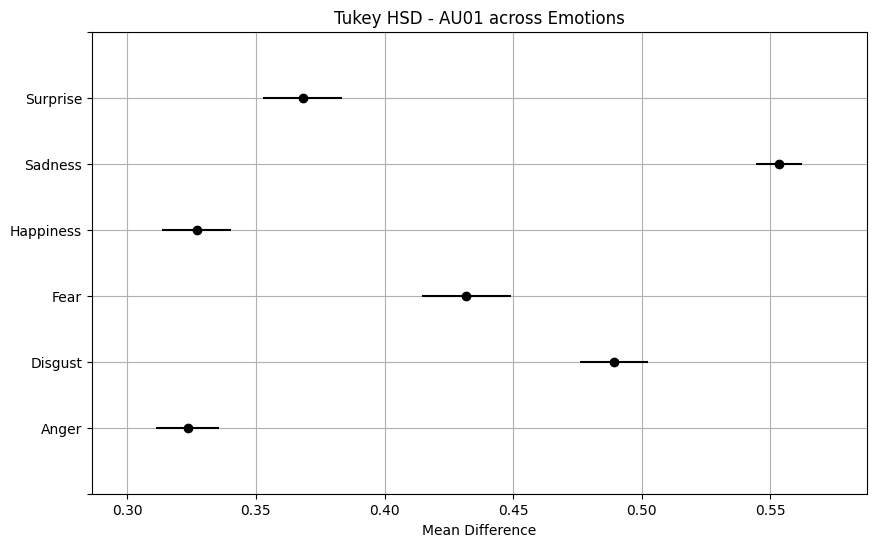

In [9]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

fig = tukey_emotion.plot_simultaneous(figsize=(10, 6))
plt.title('Tukey HSD - AU01 across Emotions')
plt.xlabel('Mean Difference')
plt.grid(True)
plt.show()

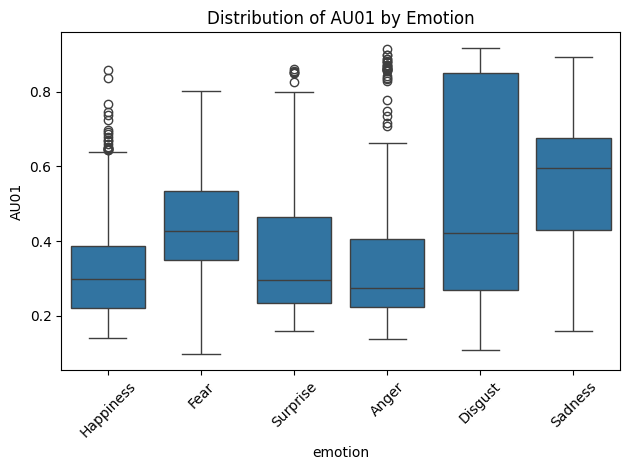

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='emotion', y='AU01', data=df1)
plt.title('Distribution of AU01 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.2 AU2

In [11]:
model = ols('AU02 ~  C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df          F        PR(>F)
C(emotion)    7.259035     5.0  70.052107  4.055467e-71
Residual    107.250177  5175.0        NaN           NaN


In [12]:
df2 = final_df[['AU02', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df2['AU02'],
                                   groups=df2['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.1016    0.0  0.0809  0.1224   True
    Anger      Fear   0.1171    0.0  0.0931  0.1412   True
    Anger Happiness   0.0381    0.0  0.0171  0.0591   True
    Anger   Sadness   0.0878    0.0  0.0709  0.1048   True
    Anger  Surprise    0.056    0.0  0.0336  0.0785   True
  Disgust      Fear   0.0155 0.4725 -0.0092  0.0403  False
  Disgust Happiness  -0.0635    0.0 -0.0852 -0.0417   True
  Disgust   Sadness  -0.0138 0.2389 -0.0317  0.0041  False
  Disgust  Surprise  -0.0456    0.0 -0.0688 -0.0224   True
     Fear Happiness   -0.079    0.0  -0.104 -0.0541   True
     Fear   Sadness  -0.0293 0.0016  -0.051 -0.0077   True
     Fear  Surprise  -0.0611    0.0 -0.0873 -0.0349   True
Happiness   Sadness   0.0497    0.0  0.0315  0.0678   True
Happiness  Surprise   0.0179 0.2476 -0.0055  0.0413  Fal

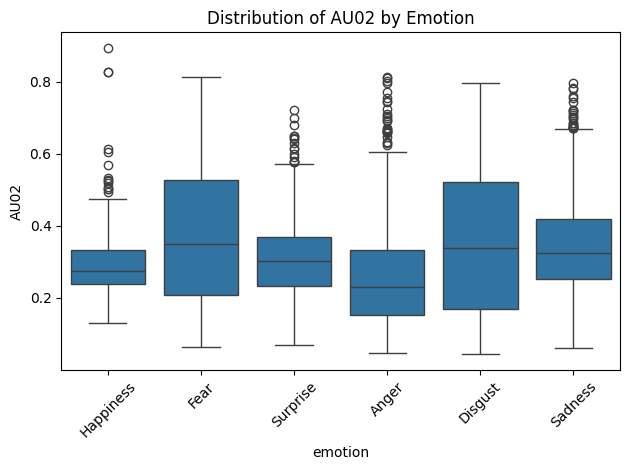

In [13]:
sns.boxplot(x='emotion', y='AU02', data=df2)
plt.title('Distribution of AU02 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.3 AU4

In [14]:
model = ols('AU04 ~  C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df          F        PR(>F)
C(emotion)   19.424987     5.0  92.857504  6.644634e-94
Residual    216.513046  5175.0        NaN           NaN


In [15]:
df4 = final_df[['AU04', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df4['AU04'],
                                   groups=df4['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower   upper  reject
---------------------------------------------------------
    Anger   Disgust   0.0709   0.0  0.0414  0.1004   True
    Anger      Fear  -0.1101   0.0 -0.1443 -0.0758   True
    Anger Happiness  -0.1325   0.0 -0.1623 -0.1026   True
    Anger   Sadness  -0.0518   0.0 -0.0758 -0.0277   True
    Anger  Surprise  -0.0021   1.0  -0.034  0.0298  False
  Disgust      Fear   -0.181   0.0 -0.2161 -0.1458   True
  Disgust Happiness  -0.2034   0.0 -0.2343 -0.1725   True
  Disgust   Sadness  -0.1227   0.0 -0.1481 -0.0973   True
  Disgust  Surprise   -0.073   0.0 -0.1059 -0.0401   True
     Fear Happiness  -0.0224 0.465 -0.0579  0.0131  False
     Fear   Sadness   0.0583   0.0  0.0275  0.0891   True
     Fear  Surprise    0.108   0.0  0.0708  0.1452   True
Happiness   Sadness   0.0807   0.0  0.0549  0.1065   True
Happiness  Surprise   0.1304   0.0  0.0972  0.1636   True
  Sadness  Sur

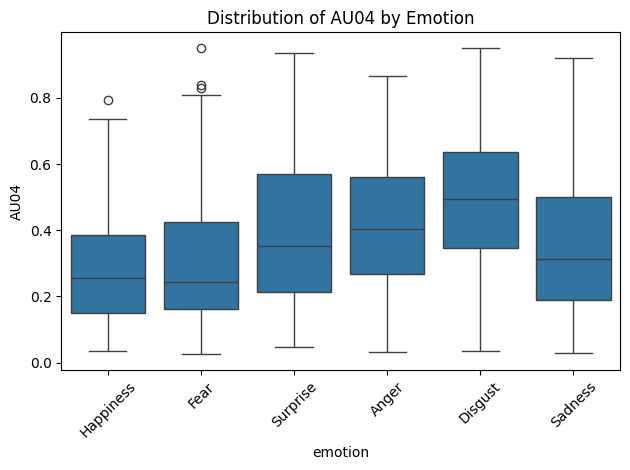

In [16]:
sns.boxplot(x='emotion', y='AU04', data=df4)
plt.title('Distribution of AU04 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.4 AU5

In [17]:
model = ols('AU05 ~  C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq      df           F         PR(>F)
C(emotion)  12.216256     5.0  147.025619  2.376825e-146
Residual    85.997430  5175.0         NaN            NaN


In [18]:
df5 = final_df[['AU05', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df5['AU05'],
                                   groups=df5['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust  -0.0842    0.0 -0.1028 -0.0656   True
    Anger      Fear   0.0616    0.0  0.0401  0.0832   True
    Anger Happiness   -0.117    0.0 -0.1358 -0.0983   True
    Anger   Sadness  -0.0194 0.0037 -0.0345 -0.0042   True
    Anger  Surprise  -0.0155   0.24 -0.0356  0.0046  False
  Disgust      Fear   0.1458    0.0  0.1237   0.168   True
  Disgust Happiness  -0.0329    0.0 -0.0523 -0.0134   True
  Disgust   Sadness   0.0648    0.0  0.0488  0.0808   True
  Disgust  Surprise   0.0687    0.0   0.048  0.0895   True
     Fear Happiness  -0.1787    0.0  -0.201 -0.1563   True
     Fear   Sadness   -0.081    0.0 -0.1004 -0.0616   True
     Fear  Surprise  -0.0771    0.0 -0.1006 -0.0537   True
Happiness   Sadness   0.0977    0.0  0.0814  0.1139   True
Happiness  Surprise   0.1016    0.0  0.0806  0.1225   Tr

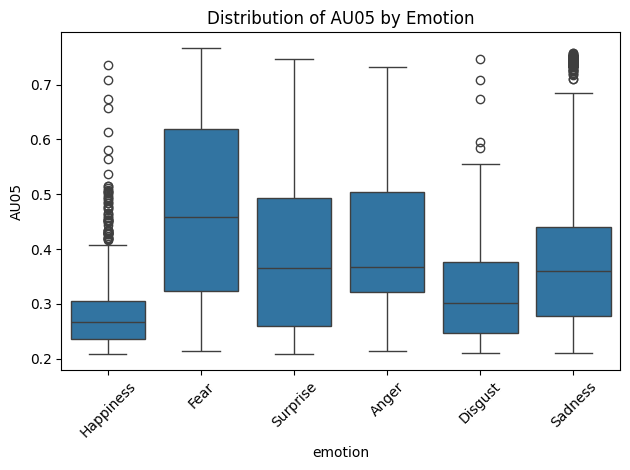

In [19]:
sns.boxplot(x='emotion', y='AU05', data=df5)
plt.title('Distribution of AU05 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.5 AU6

In [20]:
model = ols('AU06 ~  C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df            F  PR(>F)
C(emotion)  179.709957     5.0  1608.230089     0.0
Residual    115.654972  5175.0          NaN     NaN


In [21]:
df6 = final_df[['AU06', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df6['AU06'],
                                   groups=df6['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.1795    0.0   0.158  0.2011   True
    Anger      Fear   0.0633    0.0  0.0383  0.0883   True
    Anger Happiness   0.6009    0.0  0.5791  0.6227   True
    Anger   Sadness   0.0797    0.0  0.0621  0.0973   True
    Anger  Surprise   0.0493    0.0   0.026  0.0726   True
  Disgust      Fear  -0.1162    0.0 -0.1419 -0.0905   True
  Disgust Happiness   0.4214    0.0  0.3988  0.4439   True
  Disgust   Sadness  -0.0998    0.0 -0.1184 -0.0813   True
  Disgust  Surprise  -0.1302    0.0 -0.1543 -0.1062   True
     Fear Happiness   0.5376    0.0  0.5117  0.5635   True
     Fear   Sadness   0.0164 0.2979 -0.0061  0.0389  False
     Fear  Surprise   -0.014 0.6856 -0.0412  0.0132  False
Happiness   Sadness  -0.5212    0.0   -0.54 -0.5023   True
Happiness  Surprise  -0.5516    0.0 -0.5759 -0.5273   Tr

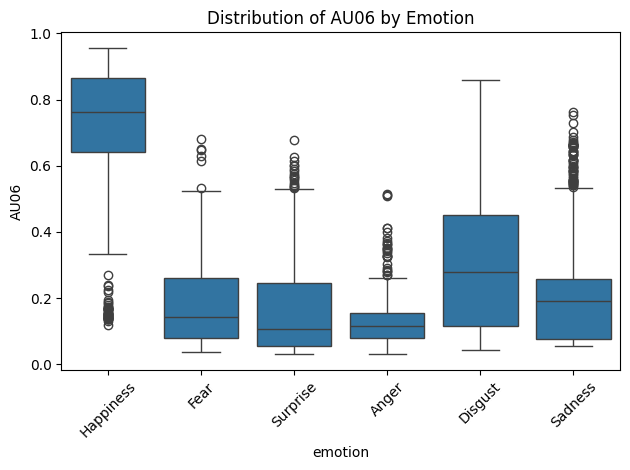

In [22]:
sns.boxplot(x='emotion', y='AU06', data=df6)
plt.title('Distribution of AU06 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.6 AU7

In [23]:
model = ols('AU07 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F  PR(>F)
C(emotion)  314.942638     5.0  395.521892     0.0
Residual    824.140551  5175.0         NaN     NaN


In [24]:
df7 = final_df[['AU07', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df7['AU07'],
                                   groups=df7['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.3205    0.0  0.2629   0.378   True
    Anger      Fear  -0.0466 0.3491 -0.1133  0.0202  False
    Anger Happiness   0.6929    0.0  0.6347  0.7511   True
    Anger   Sadness  -0.0052 0.9996 -0.0521  0.0417  False
    Anger  Surprise   0.2593    0.0   0.197  0.3215   True
  Disgust      Fear   -0.367    0.0 -0.4356 -0.2984   True
  Disgust Happiness   0.3725    0.0  0.3122  0.4328   True
  Disgust   Sadness  -0.3257    0.0 -0.3752 -0.2761   True
  Disgust  Surprise  -0.0612 0.0721 -0.1254   0.003  False
     Fear Happiness   0.7395    0.0  0.6703  0.8087   True
     Fear   Sadness   0.0414 0.3632 -0.0187  0.1014  False
     Fear  Surprise   0.3058    0.0  0.2332  0.3784   True
Happiness   Sadness  -0.6981    0.0 -0.7484 -0.6478   True
Happiness  Surprise  -0.4337    0.0 -0.4985 -0.3689   Tr

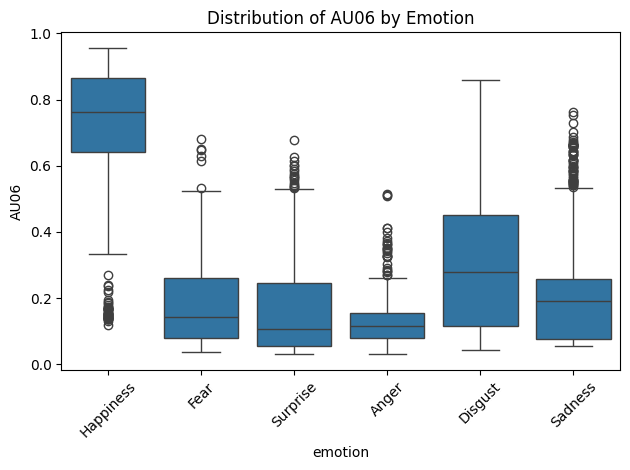

In [25]:
sns.boxplot(x='emotion', y='AU06', data=df6)
plt.title('Distribution of AU06 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.7 AU9

In [26]:
model = ols('AU09 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F  PR(>F)
C(emotion)   63.960348     5.0  360.291274     0.0
Residual    183.737339  5175.0         NaN     NaN


In [27]:
df9 = final_df[['AU09', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df9['AU09'],
                                   groups=df9['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.1667    0.0  0.1395  0.1938   True
    Anger      Fear  -0.0036 0.9995 -0.0351  0.0279  False
    Anger Happiness   0.3552    0.0  0.3277  0.3827   True
    Anger   Sadness   0.0674    0.0  0.0452  0.0895   True
    Anger  Surprise   0.0818    0.0  0.0524  0.1112   True
  Disgust      Fear  -0.1703    0.0 -0.2027 -0.1379   True
  Disgust Happiness   0.1885    0.0    0.16   0.217   True
  Disgust   Sadness  -0.0993    0.0 -0.1227 -0.0759   True
  Disgust  Surprise  -0.0849    0.0 -0.1152 -0.0546   True
     Fear Happiness   0.3588    0.0  0.3261  0.3915   True
     Fear   Sadness    0.071    0.0  0.0426  0.0993   True
     Fear  Surprise   0.0854    0.0  0.0511  0.1197   True
Happiness   Sadness  -0.2878    0.0 -0.3116 -0.2641   True
Happiness  Surprise  -0.2734    0.0  -0.304 -0.2428   Tr

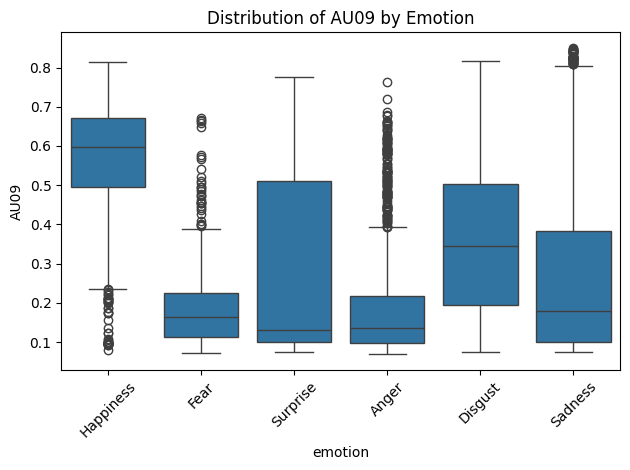

In [28]:
sns.boxplot(x='emotion', y='AU09', data=df9)
plt.title('Distribution of AU09 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.8 AU10

In [29]:
model = ols('AU10 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F  PR(>F)
C(emotion)  236.455904     5.0  700.547307     0.0
Residual    349.343803  5175.0         NaN     NaN


In [30]:
df10 = final_df[['AU10', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df10['AU10'],
                                   groups=df10['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust    0.248    0.0  0.2105  0.2854   True
    Anger      Fear   0.0148 0.9269 -0.0286  0.0583  False
    Anger Happiness   0.6957    0.0  0.6578  0.7336   True
    Anger   Sadness   0.1423    0.0  0.1117  0.1728   True
    Anger  Surprise   0.0752    0.0  0.0347  0.1157   True
  Disgust      Fear  -0.2331    0.0 -0.2778 -0.1885   True
  Disgust Happiness   0.4477    0.0  0.4085   0.487   True
  Disgust   Sadness  -0.1057    0.0  -0.138 -0.0734   True
  Disgust  Surprise  -0.1727    0.0 -0.2145 -0.1309   True
     Fear Happiness   0.6809    0.0  0.6358  0.7259   True
     Fear   Sadness   0.1274    0.0  0.0884  0.1665   True
     Fear  Surprise   0.0604 0.0037  0.0131  0.1077   True
Happiness   Sadness  -0.5534    0.0 -0.5862 -0.5207   True
Happiness  Surprise  -0.6205    0.0 -0.6627 -0.5783   Tr

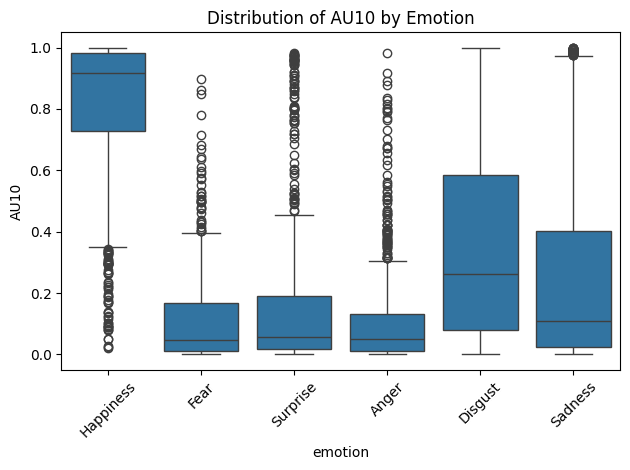

In [31]:
sns.boxplot(x='emotion', y='AU10', data=df10)
plt.title('Distribution of AU10 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.9 AU11

In [32]:
model = ols('AU11 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df          F        PR(>F)
C(emotion)    94.029419     5.0  84.193599  2.688774e-85
Residual    1155.912677  5175.0        NaN           NaN


In [33]:
df11 = final_df[['AU11', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df11['AU11'],
                                   groups=df11['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.4147    0.0  0.3466  0.4828   True
    Anger      Fear   0.1216 0.0002  0.0426  0.2007   True
    Anger Happiness   0.3434    0.0  0.2745  0.4123   True
    Anger   Sadness   0.1227    0.0  0.0671  0.1783   True
    Anger  Surprise   0.1623    0.0  0.0886   0.236   True
  Disgust      Fear  -0.2931    0.0 -0.3743 -0.2118   True
  Disgust Happiness  -0.0713 0.0508 -0.1427  0.0001  False
  Disgust   Sadness   -0.292    0.0 -0.3507 -0.2333   True
  Disgust  Surprise  -0.2524    0.0 -0.3285 -0.1764   True
     Fear Happiness   0.2218    0.0  0.1399  0.3037   True
     Fear   Sadness   0.0011    1.0   -0.07  0.0722  False
     Fear  Surprise   0.0406 0.7587 -0.0454  0.1266  False
Happiness   Sadness  -0.2207    0.0 -0.2803 -0.1611   True
Happiness  Surprise  -0.1811    0.0 -0.2579 -0.1044   Tr

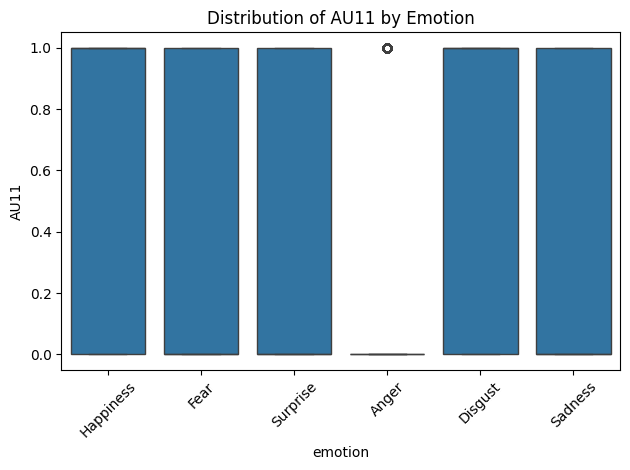

In [34]:
sns.boxplot(x='emotion', y='AU11', data=df11)
plt.title('Distribution of AU11 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.10 AU12

In [35]:
model = ols('AU12 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df            F  PR(>F)
C(emotion)  304.807764     5.0  1902.579646     0.0
Residual    165.814891  5175.0          NaN     NaN


In [36]:
df12 = final_df[['AU12', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df12['AU12'],
                                   groups=df12['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust    0.167    0.0  0.1412  0.1928   True
    Anger      Fear   0.1446    0.0  0.1146  0.1745   True
    Anger Happiness   0.7658    0.0  0.7398  0.7919   True
    Anger   Sadness   0.0608    0.0  0.0398  0.0819   True
    Anger  Surprise   0.0364 0.0028  0.0085  0.0643   True
  Disgust      Fear  -0.0225  0.298 -0.0532  0.0083  False
  Disgust Happiness   0.5988    0.0  0.5718  0.6259   True
  Disgust   Sadness  -0.1062    0.0 -0.1284  -0.084   True
  Disgust  Surprise  -0.1307    0.0 -0.1595 -0.1018   True
     Fear Happiness   0.6213    0.0  0.5902  0.6523   True
     Fear   Sadness  -0.0838    0.0 -0.1107 -0.0568   True
     Fear  Surprise  -0.1082    0.0 -0.1408 -0.0756   True
Happiness   Sadness   -0.705    0.0 -0.7276 -0.6825   True
Happiness  Surprise  -0.7295    0.0 -0.7586 -0.7004   Tr

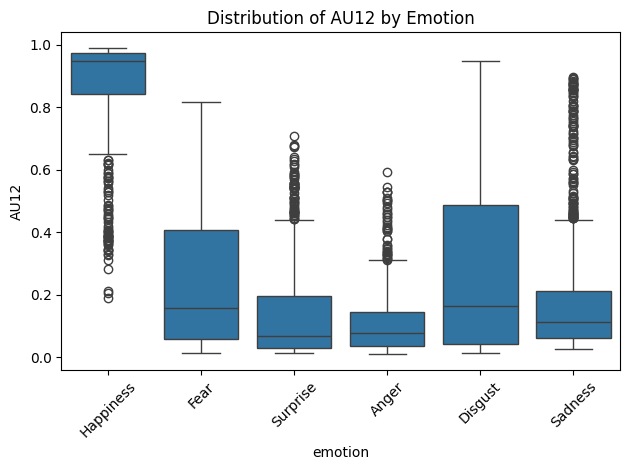

In [37]:
sns.boxplot(x='emotion', y='AU12', data=df12)
plt.title('Distribution of AU12 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.11 AU14

In [38]:
model = ols('AU14 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F         PR(>F)
C(emotion)   39.045267     5.0  236.941424  1.785922e-228
Residual    170.556296  5175.0         NaN            NaN


In [39]:
df14 = final_df[['AU14', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df14['AU14'],
                                   groups=df14['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.0233  0.112 -0.0028  0.0495  False
    Anger      Fear   0.0418 0.0013  0.0114  0.0721   True
    Anger Happiness   0.2509    0.0  0.2244  0.2773   True
    Anger   Sadness  -0.0112 0.6709 -0.0325  0.0102  False
    Anger  Surprise   0.0957    0.0  0.0674   0.124   True
  Disgust      Fear   0.0184 0.5441 -0.0128  0.0496  False
  Disgust Happiness   0.2275    0.0  0.2001   0.255   True
  Disgust   Sadness  -0.0345 0.0002  -0.057  -0.012   True
  Disgust  Surprise   0.0724    0.0  0.0431  0.1016   True
     Fear Happiness   0.2091    0.0  0.1776  0.2406   True
     Fear   Sadness  -0.0529    0.0 -0.0802 -0.0256   True
     Fear  Surprise   0.0539    0.0  0.0209   0.087   True
Happiness   Sadness   -0.262    0.0 -0.2849 -0.2391   True
Happiness  Surprise  -0.1552    0.0 -0.1846 -0.1257   Tr

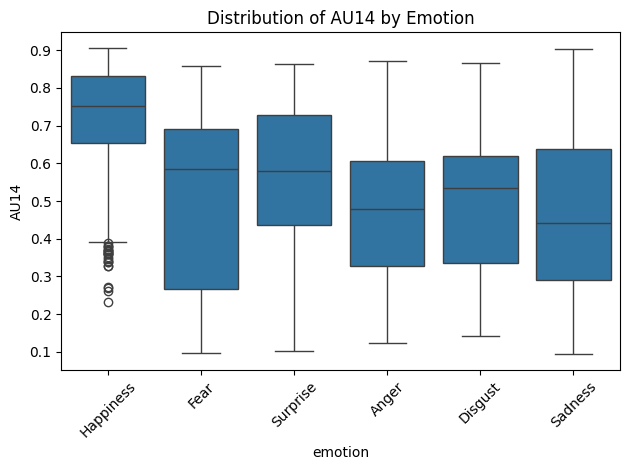

In [40]:
sns.boxplot(x='emotion', y='AU14', data=df14)
plt.title('Distribution of AU14 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.12 AU15

In [41]:
model = ols('AU15 ~ C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df         F  PR(>F)
C(emotion)   85.118297     5.0  440.2144     0.0
Residual    200.123935  5175.0       NaN     NaN


In [42]:
df15 = final_df[['AU15', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df15['AU15'],
                                   groups=df15['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.2166    0.0  0.1883  0.2449   True
    Anger      Fear   0.0661    0.0  0.0332   0.099   True
    Anger Happiness  -0.1512    0.0 -0.1798 -0.1225   True
    Anger   Sadness   0.1966    0.0  0.1735  0.2198   True
    Anger  Surprise   0.0044 0.9985 -0.0262  0.0351  False
  Disgust      Fear  -0.1505    0.0 -0.1843 -0.1167   True
  Disgust Happiness  -0.3678    0.0 -0.3975  -0.338   True
  Disgust   Sadness    -0.02 0.1812 -0.0444  0.0044  False
  Disgust  Surprise  -0.2122    0.0 -0.2438 -0.1805   True
     Fear Happiness  -0.2172    0.0 -0.2513 -0.1832   True
     Fear   Sadness   0.1305    0.0   0.101  0.1601   True
     Fear  Surprise  -0.0617    0.0 -0.0974 -0.0259   True
Happiness   Sadness   0.3478    0.0   0.323  0.3726   True
Happiness  Surprise   0.1556    0.0  0.1236  0.1875   Tr

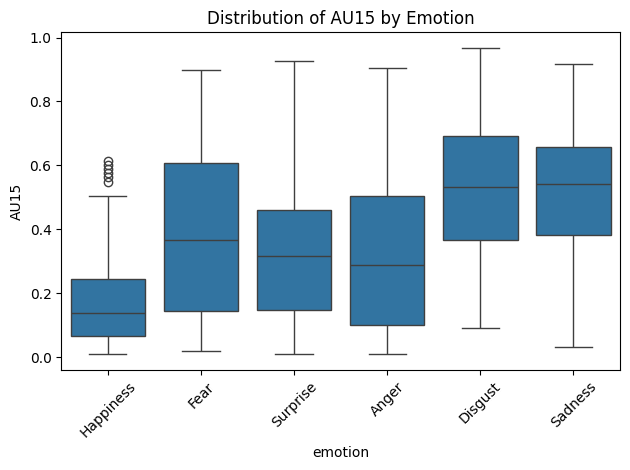

In [43]:
sns.boxplot(x='emotion', y='AU15', data=df15)
plt.title('Distribution of AU15 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.13 AU17

In [44]:
model = ols('AU17 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq      df           F         PR(>F)
C(emotion)  22.328463     5.0  317.682981  1.743627e-297
Residual    72.745349  5175.0         NaN            NaN


In [45]:
df17 = final_df[['AU17', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df17['AU17'],
                                   groups=df17['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.0096 0.5963 -0.0075  0.0267  False
    Anger      Fear   0.0215 0.0247  0.0017  0.0413   True
    Anger Happiness  -0.1468    0.0 -0.1641 -0.1296   True
    Anger   Sadness   0.0512    0.0  0.0373  0.0652   True
    Anger  Surprise  -0.0615    0.0   -0.08  -0.043   True
  Disgust      Fear   0.0119 0.5576 -0.0085  0.0323  False
  Disgust Happiness  -0.1565    0.0 -0.1744 -0.1385   True
  Disgust   Sadness   0.0416    0.0  0.0269  0.0563   True
  Disgust  Surprise  -0.0711    0.0 -0.0902  -0.052   True
     Fear Happiness  -0.1683    0.0 -0.1889 -0.1478   True
     Fear   Sadness   0.0297    0.0  0.0119  0.0476   True
     Fear  Surprise   -0.083    0.0 -0.1046 -0.0614   True
Happiness   Sadness   0.1981    0.0  0.1831   0.213   True
Happiness  Surprise   0.0853    0.0  0.0661  0.1046   Tr

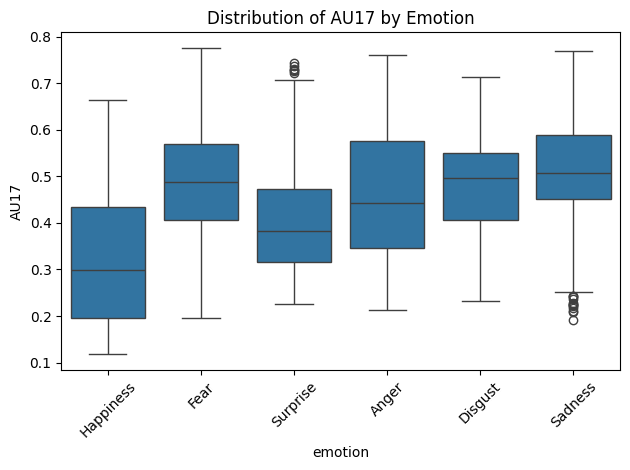

In [46]:
sns.boxplot(x='emotion', y='AU17', data=df17)
plt.title('Distribution of AU17 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.14 AU20

In [50]:
model = ols('AU20 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df           F         PR(>F)
C(emotion)   240.901446     5.0  243.307481  4.524671e-234
Residual    1024.765027  5175.0         NaN            NaN


In [49]:
df20 = final_df[['AU20', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df20['AU20'],
                                   groups=df20['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.0703 0.0221  0.0061  0.1344   True
    Anger      Fear    0.003    1.0 -0.0715  0.0774  False
    Anger Happiness   0.6271    0.0  0.5623   0.692   True
    Anger   Sadness  -0.0335 0.4501 -0.0858  0.0189  False
    Anger  Surprise   0.0771 0.0193  0.0077  0.1465   True
  Disgust      Fear  -0.0673  0.122 -0.1438  0.0092  False
  Disgust Happiness   0.5569    0.0  0.4896  0.6241   True
  Disgust   Sadness  -0.1038    0.0  -0.159 -0.0485   True
  Disgust  Surprise   0.0068 0.9998 -0.0648  0.0784  False
     Fear Happiness   0.6242    0.0   0.547  0.7013   True
     Fear   Sadness  -0.0365 0.6294 -0.1034  0.0305  False
     Fear  Surprise   0.0741  0.095 -0.0068  0.1551  False
Happiness   Sadness  -0.6606    0.0 -0.7168 -0.6045   True
Happiness  Surprise    -0.55    0.0 -0.6223 -0.4778   Tr

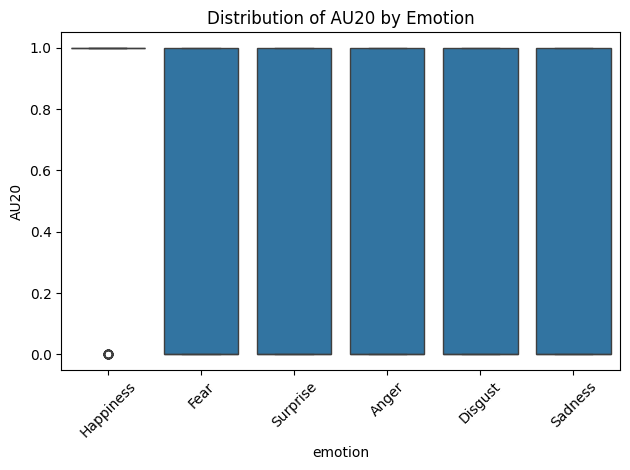

In [51]:
sns.boxplot(x='emotion', y='AU20', data=df20)
plt.title('Distribution of AU20 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.15 AU23

In [52]:
model = ols('AU23 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F         PR(>F)
C(emotion)   21.568222     5.0  204.531627  1.505252e-199
Residual    109.142580  5175.0         NaN            NaN


In [54]:
df23 = final_df[['AU23', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df23['AU23'],
                                   groups=df23['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust  -0.0899    0.0 -0.1108 -0.0689   True
    Anger      Fear  -0.0829    0.0 -0.1072 -0.0586   True
    Anger Happiness  -0.2167    0.0 -0.2379 -0.1955   True
    Anger   Sadness  -0.0402    0.0 -0.0573 -0.0231   True
    Anger  Surprise  -0.0442    0.0 -0.0668 -0.0215   True
  Disgust      Fear   0.0069  0.969  -0.018  0.0319  False
  Disgust Happiness  -0.1268    0.0 -0.1488 -0.1049   True
  Disgust   Sadness   0.0497    0.0  0.0316  0.0677   True
  Disgust  Surprise   0.0457    0.0  0.0223  0.0691   True
     Fear Happiness  -0.1338    0.0 -0.1589 -0.1086   True
     Fear   Sadness   0.0427    0.0  0.0209  0.0646   True
     Fear  Surprise   0.0388 0.0004  0.0123  0.0652   True
Happiness   Sadness   0.1765    0.0  0.1582  0.1948   True
Happiness  Surprise   0.1725    0.0  0.1489  0.1961   Tr

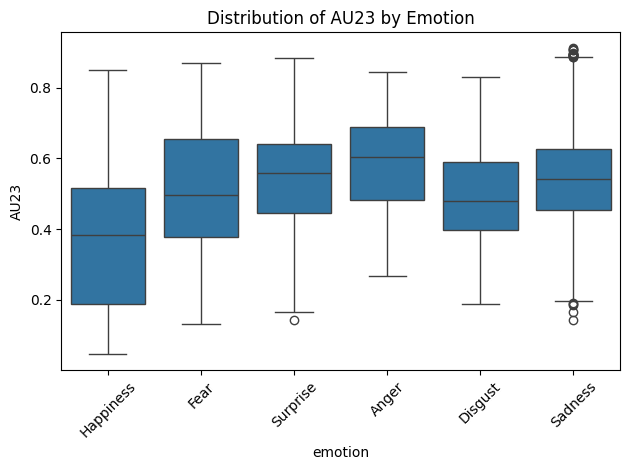

In [55]:
sns.boxplot(x='emotion', y='AU23', data=df23)
plt.title('Distribution of AU23 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.16 AU24

In [57]:
model = ols('AU24 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F  PR(>F)
C(emotion)  117.369062     5.0  585.917518     0.0
Residual    207.327781  5175.0         NaN     NaN


In [58]:
df24 = final_df[['AU24', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df24['AU24'],
                                   groups=df24['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust  -0.1122    0.0  -0.141 -0.0833   True
    Anger      Fear   0.0424 0.0042  0.0089  0.0758   True
    Anger Happiness   -0.436    0.0 -0.4652 -0.4068   True
    Anger   Sadness   0.0116  0.723 -0.0119  0.0352  False
    Anger  Surprise  -0.0995    0.0 -0.1307 -0.0682   True
  Disgust      Fear   0.1545    0.0  0.1201  0.1889   True
  Disgust Happiness  -0.3238    0.0 -0.3541 -0.2936   True
  Disgust   Sadness   0.1238    0.0  0.0989  0.1486   True
  Disgust  Surprise   0.0127 0.8717 -0.0195  0.0449  False
     Fear Happiness  -0.4783    0.0  -0.513 -0.4437   True
     Fear   Sadness  -0.0307 0.0422 -0.0608 -0.0006   True
     Fear  Surprise  -0.1418    0.0 -0.1782 -0.1054   True
Happiness   Sadness   0.4476    0.0  0.4224  0.4729   True
Happiness  Surprise   0.3365    0.0   0.304  0.3691   Tr

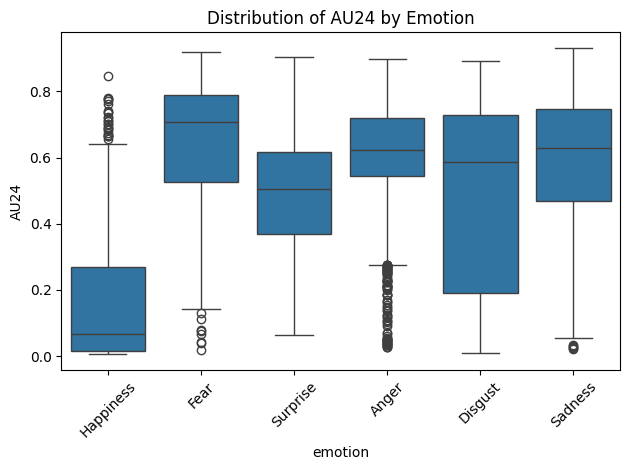

In [61]:
sns.boxplot(x='emotion', y='AU24', data=df24)
plt.title('Distribution of AU24 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.17 AU25

In [62]:
model = ols('AU25 ~ C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F  PR(>F)
C(emotion)  322.426469     5.0  697.947907     0.0
Residual    478.132239  5175.0         NaN     NaN


In [63]:
df25 = final_df[['AU25', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df25['AU25'],
                                   groups=df25['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.3179    0.0  0.2741  0.3617   True
    Anger      Fear  -0.0548  0.026 -0.1056  -0.004   True
    Anger Happiness   0.6977    0.0  0.6534   0.742   True
    Anger   Sadness  -0.0044 0.9993 -0.0401  0.0314  False
    Anger  Surprise   0.2876    0.0  0.2402   0.335   True
  Disgust      Fear  -0.3727    0.0  -0.425 -0.3205   True
  Disgust Happiness   0.3798    0.0  0.3338  0.4257   True
  Disgust   Sadness  -0.3223    0.0   -0.36 -0.2846   True
  Disgust  Surprise  -0.0303 0.4885 -0.0792  0.0186  False
     Fear Happiness   0.7525    0.0  0.6998  0.8052   True
     Fear   Sadness   0.0504 0.0208  0.0047  0.0961   True
     Fear  Surprise   0.3424    0.0  0.2871  0.3977   True
Happiness   Sadness  -0.7021    0.0 -0.7404 -0.6637   True
Happiness  Surprise    -0.41    0.0 -0.4594 -0.3607   Tr

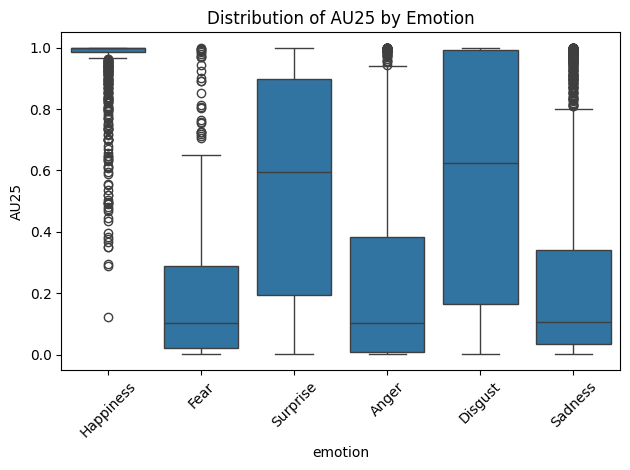

In [64]:
sns.boxplot(x='emotion', y='AU25', data=df25)
plt.title('Distribution of AU25 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.18 AU26

In [65]:
model = ols('AU26 ~  C(emotion) ', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F         PR(>F)
C(emotion)   48.123098     5.0  253.164469  1.108024e-242
Residual    196.739324  5175.0         NaN            NaN


In [66]:
df26 = final_df[['AU26', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df26['AU26'],
                                   groups=df26['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   0.0397 0.0008  0.0116  0.0678   True
    Anger      Fear  -0.0318 0.0603 -0.0645  0.0008  False
    Anger Happiness   0.2751    0.0  0.2467  0.3036   True
    Anger   Sadness   0.0009    1.0  -0.022  0.0238  False
    Anger  Surprise   0.1247    0.0  0.0943  0.1551   True
  Disgust      Fear  -0.0716    0.0 -0.1051  -0.038   True
  Disgust Happiness   0.2354    0.0  0.2059  0.2649   True
  Disgust   Sadness  -0.0388 0.0001  -0.063 -0.0146   True
  Disgust  Surprise    0.085    0.0  0.0536  0.1164   True
     Fear Happiness    0.307    0.0  0.2732  0.3408   True
     Fear   Sadness   0.0327 0.0183  0.0034  0.0621   True
     Fear  Surprise   0.1566    0.0  0.1211  0.1921   True
Happiness   Sadness  -0.2742    0.0 -0.2988 -0.2496   True
Happiness  Surprise  -0.1504    0.0 -0.1821 -0.1187   Tr

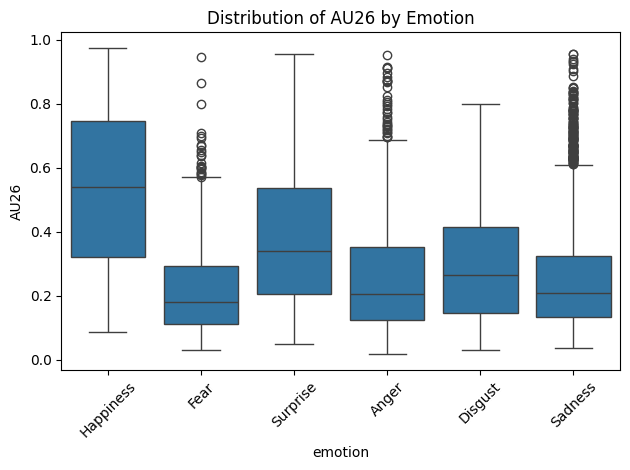

In [67]:
sns.boxplot(x='emotion', y='AU26', data=df26)
plt.title('Distribution of AU26 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.19 AU28

In [68]:
model = ols('AU28 ~ C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df           F         PR(>F)
C(emotion)   29.905046     5.0  133.809853  9.056649e-134
Residual    231.311234  5175.0         NaN            NaN


In [69]:
df28 = final_df[['AU28', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df28['AU28'],
                                   groups=df28['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust   -0.193    0.0 -0.2234 -0.1625   True
    Anger      Fear  -0.0242 0.3717 -0.0596  0.0112  False
    Anger Happiness  -0.2153    0.0 -0.2461 -0.1844   True
    Anger   Sadness  -0.0999    0.0 -0.1248 -0.0751   True
    Anger  Surprise  -0.1911    0.0 -0.2241 -0.1582   True
  Disgust      Fear   0.1688    0.0  0.1324  0.2051   True
  Disgust Happiness  -0.0223 0.3482 -0.0543  0.0096  False
  Disgust   Sadness    0.093    0.0  0.0668  0.1193   True
  Disgust  Surprise   0.0018    1.0 -0.0322  0.0358  False
     Fear Happiness  -0.1911    0.0 -0.2277 -0.1544   True
     Fear   Sadness  -0.0757    0.0 -0.1075 -0.0439   True
     Fear  Surprise  -0.1669    0.0 -0.2054 -0.1285   True
Happiness   Sadness   0.1153    0.0  0.0887   0.142   True
Happiness  Surprise   0.0241 0.3411 -0.0102  0.0585  Fal

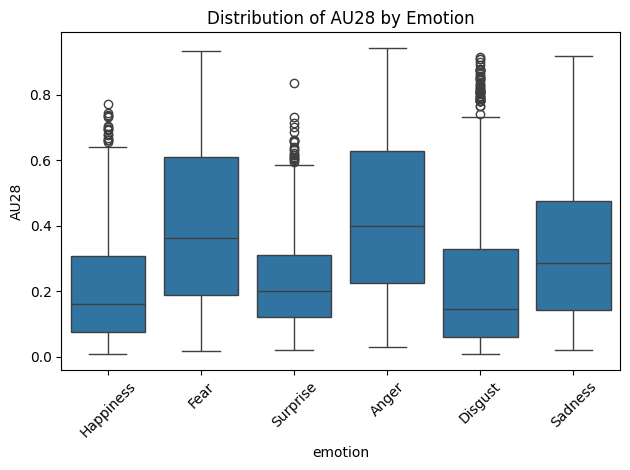

In [70]:
sns.boxplot(x='emotion', y='AU28', data=df28)
plt.title('Distribution of AU28 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.20 AU43

In [81]:
model = ols('AU43 ~ C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df          F         PR(>F)
C(emotion)   35.056523     5.0  100.69592  1.223963e-101
Residual    360.327418  5175.0        NaN            NaN


In [82]:
df43 = final_df[['AU43', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df43['AU43'],
                                   groups=df43['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust    0.155    0.0  0.1169   0.193   True
    Anger      Fear    0.042 0.0732 -0.0022  0.0861  False
    Anger Happiness   0.2708    0.0  0.2323  0.3092   True
    Anger   Sadness   0.1368    0.0  0.1057  0.1678   True
    Anger  Surprise   0.0471 0.0141   0.006  0.0883   True
  Disgust      Fear   -0.113    0.0 -0.1584 -0.0676   True
  Disgust Happiness   0.1158    0.0  0.0759  0.1557   True
  Disgust   Sadness  -0.0182 0.6087  -0.051  0.0146  False
  Disgust  Surprise  -0.1079    0.0 -0.1503 -0.0654   True
     Fear Happiness   0.2288    0.0  0.1831  0.2745   True
     Fear   Sadness   0.0948    0.0  0.0551  0.1345   True
     Fear  Surprise   0.0051 0.9997 -0.0429  0.0531  False
Happiness   Sadness   -0.134    0.0 -0.1673 -0.1007   True
Happiness  Surprise  -0.2237    0.0 -0.2665 -0.1808   Tr

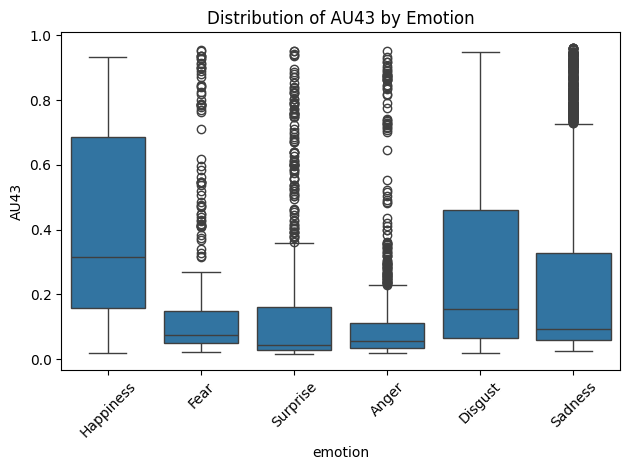

In [80]:
sns.boxplot(x='emotion', y='AU43', data=df43)
plt.title('Distribution of AU43 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ANOVA on PEDFE Dataset

#### Combine Data

In [70]:
import pandas as pd
import os

# Define base path and emotions
base_path = "/home/maram/Downloads/PrendreLaParole/PEDFE/newFPS"
emotions = ["Happiness", "Fear", "Surprise", "Anger", "Disgust", "Sadness"]

# List to collect dataframes
dfs = []

# Loop through each emotion folder
for emotion in emotions:
    file_path = os.path.join(base_path, emotion, f"{emotion}_AUs_mean.csv")  # assuming file is named mean.csv
    df = pd.read_csv(file_path, header=None, names=['AU', 'value'])  # assuming no header
    df['emotion'] = emotion
    dfs.append(df)

# Combine all into one dataframe
combined_df = pd.concat(dfs)

# Pivot so each emotion is one row and each AU is a column
final_df = combined_df.pivot(index='emotion', columns='AU', values='value').reset_index()

# Save the final combined file
final_df.to_csv(os.path.join(base_path,"combined-AUs.csv"), index=False)

print("✅ Combined CSV saved as combined_emotions.csv")


✅ Combined CSV saved as combined_emotions.csv


#### One way ANOVA 

In [71]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load combined AU data
file_path = "/home/maram/Downloads/PrendreLaParole/PEDFE/newFPS/combined-AUs.csv"
df = pd.read_csv(file_path)

# Melt the dataframe: each row will be one AU value, with corresponding emotion and AU name
df_melted = df.melt(id_vars='emotion', var_name='AU', value_name='value')

# Run ANOVA for each AU
for au in df_melted['AU'].unique():
    try:
        df_au = df_melted[df_melted['AU'] == au]
        model = ols('value ~ C(emotion)', data=df_au).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        p_value = anova_table['PR(>F)'][0]
        if p_value < 0.05:
            print(f"{au} is significant (p = {p_value:.4f})")
        else:
            print(f"{au} is NOT significant (p = {p_value:.4f})")
    except Exception as e:
        print(f"Error processing {au}: {e}")


Error processing Unnamed: 1: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU01: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU02: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU04: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU05: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU06: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU07: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU09: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU10: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU11: r_matrix performs f_test for using 

/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_re

## 2. OpenFace

### 2.1 Format the Data

In [10]:
import glob

base_path = "/home/maram/Downloads/PrendreLaParole/PEDFE/newFPS"
emotions = ["Happiness", "Fear", "Surprise", "Anger", "Disgust", "Sadness"]

all_data = []

for emotion in emotions:
    folder_path = os.path.join(base_path, emotion, f"OpenFace")
    csv_files = glob.glob(os.path.join(folder_path,"*.csv"))
    
    for csv_path in csv_files:
        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            df = df[[col for col in df.columns if col.endswith('_r') or col == 'frame' ]]
            df["emotion"] = emotion
            all_data.append(df)
        else:
            print(f"CSV not found: {csv_path}")

# Combine all rows into one DataFrame
combined_df2 = pd.concat(all_data, ignore_index=True)

# Reorder columns: AU columns first, then 'resident', 'emotion'
au_cols = [col for col in combined_df2.columns if col not in [ "emotion"]]
combined_df2 = combined_df2[ ["emotion"] + au_cols]

# Save if needed
combined_df2.to_csv(os.path.join(base_path,"Frames_all_OpenFace.csv"), index=False)

print("Combined dataset created with shape:", combined_df2.shape)

Combined dataset created with shape: (5211, 19)


In [11]:
combined_df2

,emotion,frame,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,Happiness,1,0.19,0.28,0.27,0.28,0.70,0.86,0.0,1.21,1.57,0.45,0.53,0.93,0.14,0.0,0.00,1.93,0.00
1,Happiness,2,0.25,0.10,0.38,0.21,0.73,1.08,0.0,1.21,1.60,0.69,0.71,0.65,0.05,0.0,0.00,1.67,0.00
2,Happiness,3,0.32,0.01,0.36,0.12,0.75,1.11,0.0,1.20,1.62,0.81,0.80,0.53,0.05,0.0,0.00,1.61,0.00
3,Happiness,4,0.43,0.03,0.29,0.00,0.78,1.03,0.0,1.25,1.70,0.84,0.78,0.44,0.10,0.0,0.00,1.68,0.00
4,Happiness,5,0.46,0.10,0.18,0.00,0.83,1.01,0.0,1.33,1.77,0.92,0.86,0.48,0.16,0.0,0.00,1.61,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,Sadness,138,0.00,0.00,1.30,0.00,0.00,0.28,0.0,0.00,0.00,0.00,0.05,0.47,0.00,0.0,0.34,0.19,0.00
5207,Sadness,139,0.00,0.00,1.26,0.00,0.00,0.25,0.0,0.00,0.00,0.00,0.06,0.45,0.00,0.0,0.31,0.21,0.00
5208,Sadness,140,0.00,0.00,1.26,0.00,0.00,0.20,0.0,0.00,0.00,0.00,0.13,0.51,0.00,0.0,0.29,0.20,0.03
5209,Sadness,141,0.00,0.00,1.29,0.00,0.00,0.16,0.0,0.00,0.00,0.00,0.14,0.54,0.00,0.0,0.27,0.18,0.06


### 2.2 Apply ANOVA on every AU for each resident/emotion

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

au_columns = [col for col in combined_df2.columns if col.startswith('AU')]

anova_results2 = {}

for au in au_columns:
    df_au = combined_df2[[au, 'emotion']].dropna()
    model = ols(f'{au} ~ C(emotion)', data=df_au).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][0]
    anova_results2[au] = p_value

/tmp/ipykernel_17083/3119617564.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_17083/3119617564.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_17083/3119617564.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_17083/3119617564.py:12: FutureWarning: Series.__getitem__ tre

In [28]:
anova_results2

{'AU01_r': 8.266286406491776e-22,
 'AU02_r': 4.535144001527095e-11,
 'AU04_r': 0.0,
 'AU05_r': 3.496801655433497e-05,
 'AU06_r': 0.0,
 'AU07_r': 0.0,
 'AU09_r': 1.155764477650895e-05,
 'AU10_r': 7.405134694942196e-202,
 'AU12_r': 0.0,
 'AU14_r': 0.0,
 'AU15_r': 1.3990081598691416e-18,
 'AU17_r': 4.827225129445646e-114,
 'AU20_r': 0.017620899792994145,
 'AU23_r': 1.0413802056742098e-15,
 'AU25_r': 6.140919007708473e-58,
 'AU26_r': 2.2148257115721554e-40,
 'AU45_r': 3.936244893712412e-10}

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for au in anova_results2:
    df_au = combined_df2[[au, 'emotion']].dropna()
    tukey = pairwise_tukeyhsd(endog=df_au[au],
                              groups=df_au['emotion'],
                              alpha=0.05)
    print(f'==== {au} ====')
    print(tukey)


==== AU01_r ====
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Anger   Disgust  -0.0348  0.275 -0.0816  0.0119  False
    Anger      Fear   0.1074    0.0  0.0532  0.1616   True
    Anger Happiness   0.0347 0.2907 -0.0126   0.082  False
    Anger   Sadness   0.0006    1.0 -0.0376  0.0387  False
    Anger  Surprise   0.1107    0.0  0.0608  0.1605   True
  Disgust      Fear   0.1423    0.0  0.0865   0.198   True
  Disgust Happiness   0.0695 0.0008  0.0205  0.1185   True
  Disgust   Sadness   0.0354 0.1229 -0.0049  0.0757  False
  Disgust  Surprise   0.1455    0.0   0.094   0.197   True
     Fear Happiness  -0.0727 0.0031 -0.1289 -0.0166   True
     Fear   Sadness  -0.1069    0.0 -0.1556 -0.0581   True
     Fear  Surprise   0.0033    1.0 -0.0551  0.0616  False
Happiness   Sadness  -0.0341 0.1632  -0.075  0.0067  False
Happiness  Surprise    0.076 0.0004   0

#### 2.2.1 Detaillé

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#two way anova without interaction
model = ols('AU01_r ~ C(emotion)  ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df          F        PR(>F)
C(emotion)   11.536825     5.0  21.933102  8.266286e-22
Residual    547.566661  5205.0        NaN           NaN


In [44]:
model = ols('AU02_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(emotion)   0.020553   5.0  0.965057  0.482737
C(resident)  0.000227   2.0  0.026647  0.973774
Residual     0.042594  10.0       NaN       NaN


In [45]:
model = ols('AU04_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F   PR(>F)
C(emotion)   0.393120   5.0  0.824041  0.56004
C(resident)  1.512501   2.0  7.926085  0.00866
Residual     0.954128  10.0       NaN      NaN


In [46]:
model = ols('AU05_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(emotion)   0.011244   5.0  1.240012  0.359909
C(resident)  0.000762   2.0  0.210146  0.813955
Residual     0.018135  10.0       NaN       NaN


In [47]:
model = ols('AU06_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(emotion)   1.850625   5.0  1.242098  0.359108
C(resident)  4.473566   2.0  7.506395  0.010214
Residual     2.979836  10.0       NaN       NaN


In [48]:
model = ols('AU07_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq    df          F    PR(>F)
C(emotion)    1.140041   5.0   0.942277  0.494550
C(resident)  10.303445   2.0  21.290228  0.000249
Residual      2.419759  10.0        NaN       NaN


In [49]:
model = ols('AU09_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(emotion)   0.005500   5.0  0.458705  0.798379
C(resident)  0.001143   2.0  0.238300  0.792316
Residual     0.023982  10.0       NaN       NaN


In [50]:
model = ols('AU10_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df          F    PR(>F)
C(emotion)   2.871645   5.0   2.658955  0.088311
C(resident)  8.463761   2.0  19.592215  0.000347
Residual     2.159981  10.0        NaN       NaN


In [51]:
model = ols('AU12_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df          F    PR(>F)
C(emotion)   1.687378   5.0   5.545479  0.010563
C(resident)  1.543659   2.0  12.682888  0.001808
Residual     0.608560  10.0        NaN       NaN


In [52]:
model = ols('AU14_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(emotion)   4.260290   5.0  3.458814  0.044930
C(resident)  1.319489   2.0  2.678142  0.117103
Residual     2.463440  10.0       NaN       NaN


In [53]:
model = ols('AU15_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(emotion)   0.043075   5.0   1.22854  0.364343
C(resident)  0.238861   2.0  17.03123  0.000602
Residual     0.070124  10.0       NaN       NaN


In [54]:
model = ols('AU17_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(emotion)   0.343614   5.0  1.687973  0.224840
C(resident)  0.409701   2.0  5.031552  0.030762
Residual     0.407132  10.0       NaN       NaN


In [55]:
model = ols('AU20_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(emotion)   0.023229   5.0  0.918757  0.507020
C(resident)  0.034560   2.0  3.417343  0.073956
Residual     0.050566  10.0       NaN       NaN


In [56]:
model = ols('AU23_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df          F    PR(>F)
C(emotion)   0.007811   5.0   0.435743  0.814051
C(resident)  0.161723   2.0  22.555357  0.000197
Residual     0.035850  10.0        NaN       NaN


In [57]:
model = ols('AU25_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df          F    PR(>F)
C(emotion)   0.278003   5.0   2.679610  0.086694
C(resident)  0.470002   2.0  11.325586  0.002695
Residual     0.207495  10.0        NaN       NaN


In [58]:
model = ols('AU26_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq    df         F    PR(>F)
C(emotion)   0.46025   5.0  2.540289  0.098311
C(resident)  0.07119   2.0  0.982314  0.407853
Residual     0.36236  10.0       NaN       NaN


In [59]:
model = ols('AU45_r ~ C(emotion) + C(resident) ', data=combined_df2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df         F    PR(>F)
C(emotion)   0.024205   5.0  1.036914  0.447166
C(resident)  0.055585   2.0  5.952881  0.019825
Residual     0.046688  10.0       NaN       NaN


In [78]:
import os
import pandas as pd

# Define base path and emotions
base_path = "/home/maram/Downloads/PrendreLaParole/PEDFE/newFPS"
emotions = ["Happiness", "Fear", "Surprise", "Anger", "Disgust", "Sadness"]

# List of Action Units to extract
aus = ['AU01_r',  	'AU02_r',	'AU04_r',	'AU05_r'	,'AU06_r'	,'AU07_r',	'AU09_r',	'AU10_r',	'AU12_r',	'AU14_r',	'AU15_r',	'AU17_r',	'AU20_r',	'AU23_r',	'AU25_r',	'AU26_r',	'AU45_r'
]

# Collect all mean AU rows
all_rows = []

for emotion in emotions:
    emotion_path = os.path.join(base_path, emotion,"OpenFace")
    for file in os.listdir(emotion_path):
        if file.endswith(".csv"):
            file_path = os.path.join(emotion_path, file)
            df = pd.read_csv(file_path)

            # Compute mean for each AU
            mean_values = df[aus].mean()
            mean_values['emotion'] = emotion
            mean_values['video'] = file
            all_rows.append(mean_values)

# Create final dataframe and save
final_df11 = pd.DataFrame(all_rows)
cols = ['emotion'] + [col for col in final_df11.columns if col != 'emotion']
final_df11 = final_df11[cols]
final_df11.to_csv(os.path.join(base_path, "all_normal_AUs.csv"), index=False)

print("Combined AU means saved to all_normal_AUs.csv")


Combined AU means saved to all_normal_AUs.csv


In [79]:
final_df11

,emotion,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,video
0,Happiness,0.123256,0.047907,0.185349,0.041860,1.401395,1.754651,0.029767,2.074419,2.959302,1.213953,0.153953,0.273953,0.071860,0.457674,0.155814,0.536047,0.151395,5_fg_2.csv
1,Happiness,0.076336,0.055878,0.187939,0.027252,1.307176,0.117786,0.039008,0.519847,2.125267,2.587557,0.062061,0.182595,0.032595,0.047099,0.365954,0.119466,0.146947,3_fg_2.csv
2,Happiness,0.055556,0.016667,0.003333,0.010000,1.028148,0.000000,0.019630,2.719630,3.132222,2.672222,0.104444,0.220000,0.054444,0.025556,0.262222,0.195926,0.045185,53_fg_1.csv
3,Happiness,0.245584,0.051169,0.127143,0.027792,1.936623,2.636623,0.077792,1.645974,3.506234,1.775065,0.062468,0.151039,0.075455,0.018831,0.080390,0.294935,0.084805,34_fg_1.csv
4,Happiness,0.218533,0.051600,0.367200,0.084667,2.805200,1.971600,0.034400,1.758933,3.299067,1.413733,0.094533,0.174400,0.067733,0.309867,0.262267,0.256667,0.190133,16_fg_5.csv
5,Happiness,0.112105,0.036842,0.249079,0.071184,0.863684,0.552237,0.065789,0.752763,1.786316,1.871184,0.062895,0.490263,0.078816,0.081842,1.215000,0.214211,0.379211,19_fg_2.csv
6,Happiness,0.294409,0.082688,0.220968,0.034516,2.182043,2.251505,0.043548,1.238925,2.557419,1.297849,0.170108,0.162688,0.114624,0.062366,0.207742,0.357634,0.126559,49_fg_5.csv
7,Happiness,0.260806,0.214032,0.303871,0.129677,2.806613,1.004516,0.043226,1.232581,2.967903,1.679516,0.108387,0.653871,0.099839,0.080323,0.231774,0.759839,0.114032,24_fg_3.csv
8,Happiness,0.118542,0.169375,0.711667,0.116042,1.731875,0.897917,0.222292,1.645833,2.311875,1.331250,0.192292,0.349583,0.076458,0.085417,1.467708,0.363750,0.370000,18_fg_4.csv
9,Happiness,0.082424,0.034242,0.482576,0.047273,0.663182,0.198485,0.015152,1.574242,1.470303,1.079848,0.048939,0.343636,0.055606,0.028333,0.733030,0.157424,0.195758,26_fg_1.csv
